In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
folder = Path.cwd().parent

In [8]:
baselines = pd.read_csv(folder / '_storage/baselines' / 'baselines_met.csv', index_col=0)
baseline = baselines.drop(['Viscocity(mmHg*s)','Resistance for U', 'U in single(µm/s)'],axis=1).rename(columns={'Saturation ave': 'Sav'})
constant = baseline.copy().drop(['Q in single(µm3/s)','Pressure Drop(mmHg)','Saturation in','Saturation out','Resistance for Q','dS','Sav','partial pressure blood(mmHg)','X-Area wall(???)','wall thickness(µm)','tissue partials(mmHg)'], axis=1)
first_iteration_vessels = baseline.copy().loc[:,['Name','Number','Diameter(µm)','Length(µm)','Saturation in','Saturation out','Sav','Resistance for Q','Q in single(µm3/s)','Vt(µm3)','partial pressure blood(mmHg)','X-Area wall(???)','wall thickness(µm)','tissue partials(mmHg)']]

In [52]:
sum_of_Vts = first_iteration_vessels['Vt(µm3)'].sum()
baseline_pt_averaged = ( (first_iteration_vessels['tissue partials(mmHg)']*first_iteration_vessels['Vt(µm3)']).sum() ) / (first_iteration_vessels['Vt(µm3)'].sum())
pt_averaged_50 = baseline_pt_averaged*0.5
pt_averaged_5 = baseline_pt_averaged*0.1  

kp_constant = 1/300 # s-1
kn_constant = 1/150 # s-1

# pt_averaged_50 = baseline_pt_averaged*0.5
# pt_averaged_5 = baseline_pt_averaged*0.1  

pt_averaged_50 = baseline_pt_averaged*0.5
pt_averaged_5 = baseline_pt_averaged*0.2

def single(pt):
    
    Ap = 1
    Dp = 0

    kp_p = (kn_constant/2)*(1-np.tanh( (pt-pt_averaged_50) / pt_averaged_5))
    kp_n = (kn_constant/2)*(1+np.tanh( (pt-pt_averaged_50) / pt_averaged_5 ))
    dApdt = -kp_p*Ap + kp_n*(1-Ap-Dp) #dAndt
    dDpdt = kp_p*(1-Ap-Dp) #dDndt
#     print(pt, '\n dApdt:',dApdt,'\n dDpdt:',dDpdt)
    return dApdt

# single(35)

100%|██████████| 100000/100000 [00:00<00:00, 143536.88it/s]


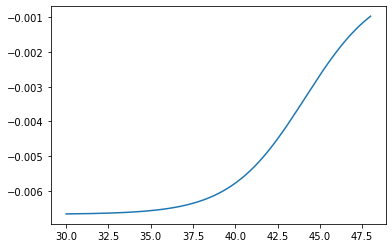

In [53]:
pt_averaged_50 = baseline_pt_averaged*1
pt_averaged_5 = baseline_pt_averaged*0.1
no = 100000
pt= np.linspace(30,48,num=no)
out = np.zeros(no)

for i in tqdm(range(no)):
    out[i] = single(pt[i])
    
plt.plot(pt,out)

In [33]:
baseline_pt_averaged

44.113829801035656